In [1]:
%%html
<style>
.container { width:80% !important; }
</style>

In [2]:
import h5py

In [3]:
import caffe

In [4]:
caffe.set_device(0)
caffe.set_mode_gpu()

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [126]:
def dummy(N, label=0):
    signal_len = 8
    if N < 2:
        raise ValueError("hi")
    L = N * 10
    x = 0.1 * np.random.rand(L)
    if not label:
        return x
    pos = np.random.randint(0, L - signal_len)
    x[pos: pos + signal_len] = 1
    return x

def dummy2stream(d, T_max=20):
    T = len(d) / 10
    if T > T_max:
        raise ValueError("T > T_max")
    out = - np.ones((T_max, 10))
    d = np.reshape(d, (T, 10))
    out[:T, :] = d
    return out, T

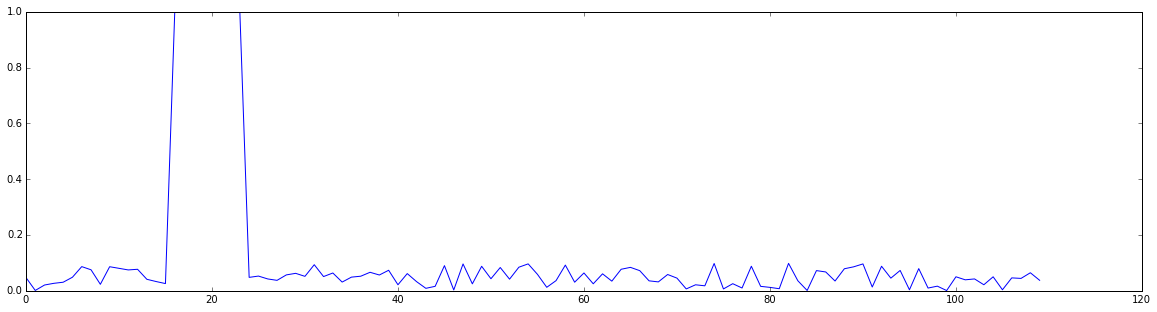

In [131]:
plt.figure(figsize=(20, 5))
D = dummy(11, 1)
plt.plot(D)

In [132]:
d_stream, d_len = dummy2stream(D)
d_len, d_stream[0] == D[: 10]

(11,
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool))

In [133]:
T, N, V = 20, 100, 10
h5 = h5py.File("data/input.h5", "w")

In [134]:
h5.create_dataset("data", shape=(T, N, V), dtype='f8')
h5.create_dataset("label", shape=(T, N), dtype='f8')
h5.create_dataset("cont", shape=(T, N), dtype='f8')

<HDF5 dataset "cont": shape (20, 100), type "<f8">

In [135]:
np.random.seed(20)
for i in range(N):
    l = np.random.rand() > 0.5
    D = dummy(np.random.randint(10, 20), l)
    d_stream, d_len = dummy2stream(D)
    h5["data"][:, i, :] = d_stream
    h5["label"][:, i] = l
    # set continuouty indicator
    h5["cont"][: d_len, i] = 1
    h5["cont"][d_len: , i] = 0
    h5["cont"][0, i] = 0

In [136]:
h5.close()

In [144]:
h5 = h5py.File("data/input.h5", "r")

In [145]:
ind = 2
x = np.reshape(h5["data"][:, ind, :], (200, ))

[ 1.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  1.
  1.  0.  1.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.
  0.  1.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.
  1.  0.  0.  1.  1.  0.  0.  1.  0.  1.  0.  1.  0.  1.  1.  1.  0.  0.
  0.  0.  1.  1.  0.  1.  1.  1.  0.  1.]


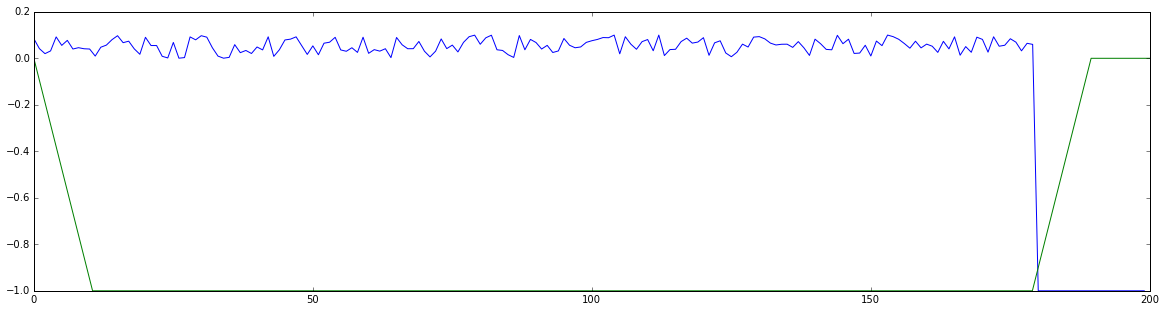

In [146]:
plt.figure(figsize=(20, 5))
print h5["label"][ind]
plt.plot(x)
plt.plot(np.linspace(0, 200, 20), -h5["cont"][:, ind])

In [147]:
h5.close()